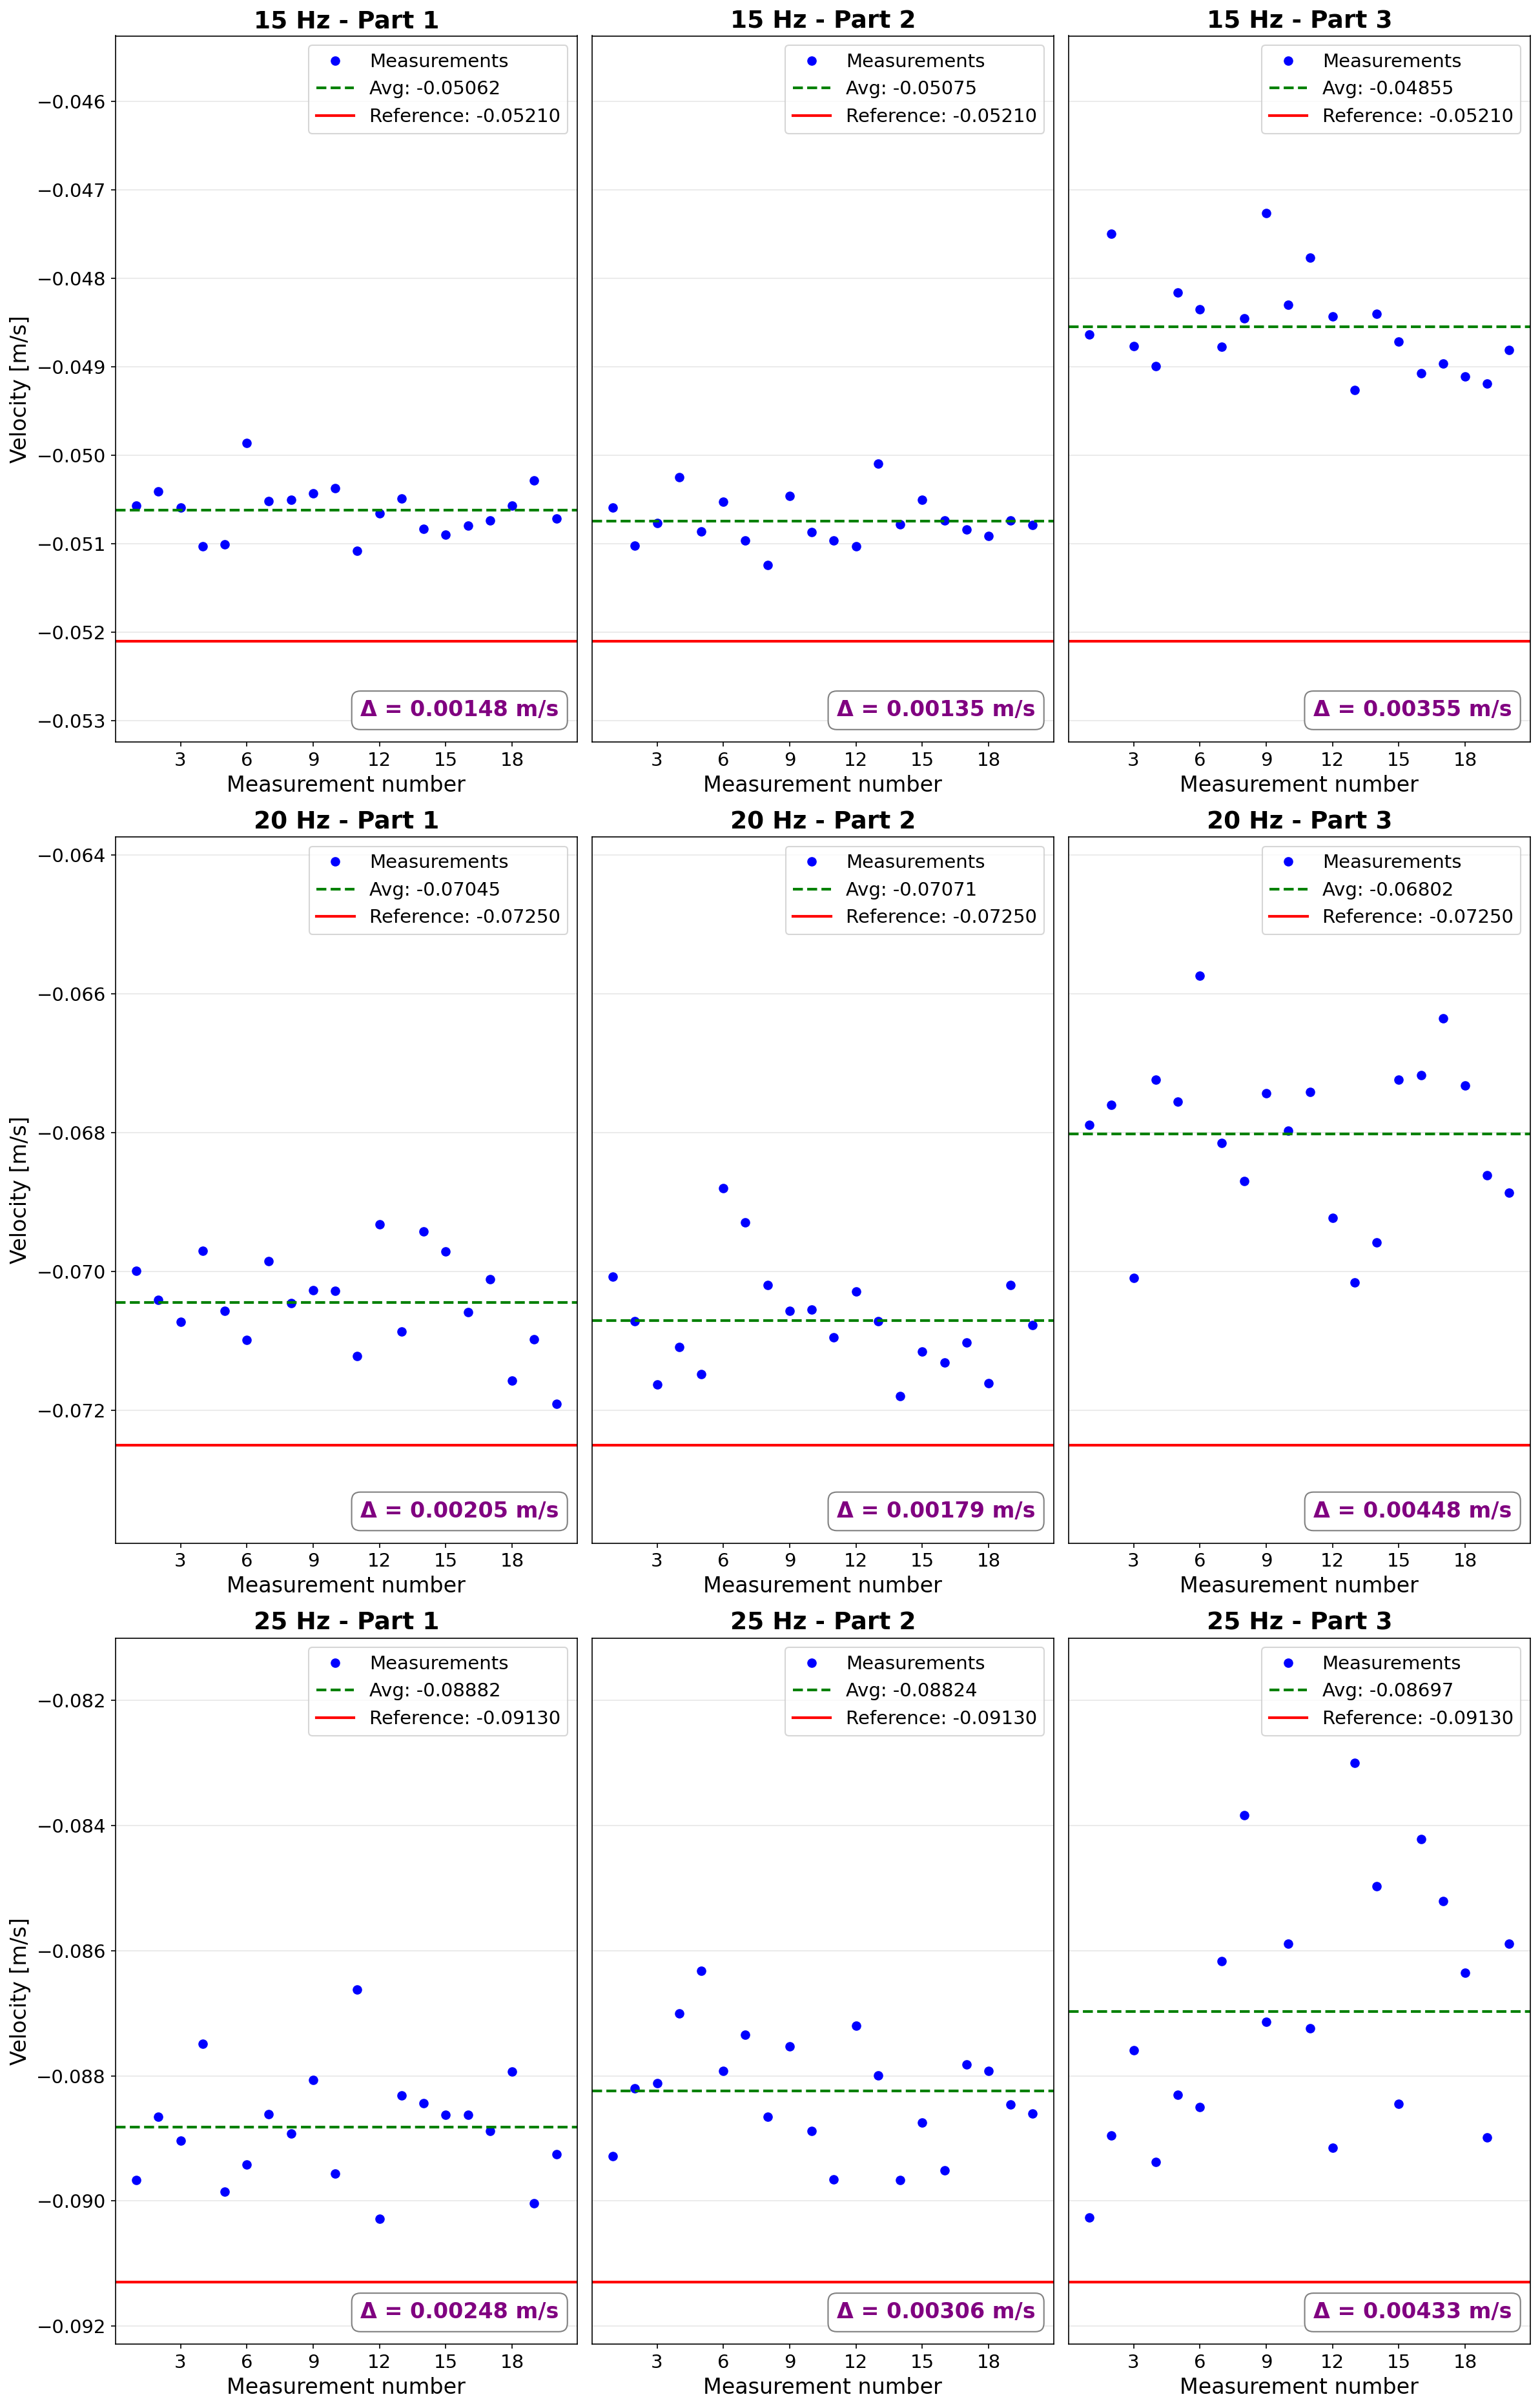

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
# Data
part1_15 = np.array([-0.0505723, -0.0504077, -0.0505921, -0.0510263, -0.0510076,
    -0.0498635, -0.0505143, -0.0505054, -0.0504302, -0.0503712,
    -0.0510777, -0.0506533, -0.0504854, -0.0508313, -0.0508988,
    -0.0507951, -0.0507369, -0.0505667, -0.0502857, -0.0507112])
part2_15 = np.array([-0.0505877, -0.0510205, -0.0507668, -0.0502463, -0.0508594,
    -0.0505287, -0.0509603, -0.0512395, -0.0504605, -0.0508662,
    -0.0509647, -0.0510254, -0.0500937, -0.0507802, -0.0505024,
    -0.0507366, -0.0508382, -0.0509105, -0.0507355, -0.0507854])
part3_15 = np.array([-0.0486324, -0.0474955, -0.0487685, -0.0489968, -0.0481608,
    -0.0483545, -0.0487714, -0.0484498, -0.0472618, -0.0482984,
    -0.0477707, -0.0484285, -0.0492603, -0.0484034, -0.048717,
    -0.0490746, -0.0489668, -0.0491071, -0.049187, -0.0488081])

part1_20 = np.array([-0.0699914, -0.0704046, -0.0707237, -0.0697003, -0.0705653,
    -0.0709885, -0.0698471, -0.0704528, -0.0702672, -0.0702808,
    -0.071217, -0.0693197, -0.0708661, -0.0694243, -0.0697111,
    -0.0705876, -0.0701155, -0.0715707, -0.070977, -0.0719093])
part2_20 = np.array([-0.0700737, -0.0707169, -0.0716243, -0.0710905, -0.071477,
    -0.068797, -0.0692921, -0.0701968, -0.0705667, -0.0705445,
    -0.0709462, -0.0702856, -0.0707128, -0.0717949, -0.0711489,
    -0.0713143, -0.0710199, -0.0716063, -0.0701979, -0.0707669])
part3_20 = np.array([-0.0678866, -0.0676026, -0.0700948, -0.0672423, -0.0675554,
    -0.0657436, -0.0681542, -0.0686945, -0.0674351, -0.0679686,
    -0.0674171, -0.0692294, -0.0701608, -0.0695791, -0.0672408,
    -0.06717, -0.0663528, -0.0673194, -0.0686189, -0.0688642])

part1_25 = np.array([-0.089671, -0.0886529, -0.0890371, -0.087493, -0.0898506,
    -0.0894232, -0.0886147, -0.0889276, -0.0880677, -0.0895679,
    -0.0866252, -0.0902903, -0.0883128, -0.0884344, -0.0886235,
    -0.0886219, -0.0888859, -0.0879303, -0.0900391, -0.0892582])
part2_25 = np.array([-0.0892884, -0.0881982, -0.0881141, -0.0870009, -0.086326,
    -0.0879187, -0.0873397, -0.088651, -0.0875257, -0.0888833,
    -0.089657, -0.0871985, -0.0879925, -0.0896719, -0.0887436,
    -0.0895125, -0.0878196, -0.0879203, -0.0884601, -0.088605])
part3_25 = np.array([-0.0902636, -0.0889582, -0.087594, -0.0893784, -0.0883062,
    -0.0884972, -0.0861629, -0.0838324, -0.0871411, -0.0858903,
    -0.0872433, -0.0891483, -0.0829998, -0.0849703, -0.0884482,
    -0.0842108, -0.0852121, -0.0863507, -0.088989, -0.0858874])

datasets = [
    (15, [part1_15, part2_15, part3_15]),
    (20, [part1_20, part2_20, part3_20]),
    (25, [part1_25, part2_25, part3_25])
]
true_velocities = [-0.0521, -0.0725, -0.0913]  # reference per frequency

fig, axes = plt.subplots(3, 3, figsize=(16, 26), dpi=150)

for row, (freq, parts) in enumerate(datasets):
    all_vals = np.concatenate(parts)
    y_min = all_vals.min() - 0.002
    y_max = all_vals.max() + 0.002

    for col, part in enumerate(parts):
        ax = axes[row, col]
        x_vals = range(1, len(part) + 1)
        ax.plot(x_vals, part, 'o', color="blue", label="Measurements")

        avg = np.mean(part)
        ref = true_velocities[row]
        delta = avg - ref
        ax.axhline(avg, color="green", linestyle="--", linewidth=2,
                   label=f"Avg: {avg:.5f}")
        ax.axhline(ref, color="red", linestyle="-", linewidth=2,
                   label=f"Reference: {ref:.5f}")

        ax.text(0.96, 0.06, f"Δ = {delta:.5f} m/s",
                transform=ax.transAxes,
                fontsize=16,
                fontweight='bold',
                color="purple",
                horizontalalignment='right',
                verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=1.0, edgecolor='gray'))

        ax.set_title(f"{freq} Hz - Part {col+1}", fontsize=18, fontweight='bold')
        ax.set_xlabel("Measurement number", fontsize=16)

        # Only set y-axis label and ticks on the first column
        if col == 0:
            ax.set_ylabel("Velocity [m/s]", fontsize=16)
            ax.yaxis.set_major_locator(mticker.AutoLocator())
            ax.tick_params(axis='y', labelsize=14)
        else:
            ax.set_yticklabels([])
            ax.tick_params(axis='y', which='both', length=0)  # remove y ticks

        ax.grid(True, which='both', axis='y', alpha=0.3)
        ax.set_ylim(y_min, y_max)
        ax.legend(loc='upper right', fontsize=14)

        ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
        ax.tick_params(axis='x', which='major', labelsize=14)

plt.subplots_adjust(hspace=0.35)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [57]:
fig.savefig("velocity_plots.pdf", bbox_inches='tight')